In [2]:
#imports
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# objective function
def objective(x, y):
    return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

In [6]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = []
    
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    
    # initialize first and second moments at 0
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    for t in range(n_iter):
        # calc gradient
        g = derivative(x[0], x[1])
        
        #update
        for i in range(bounds.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(t+1))
            vhat = v[i] / (1.0 - beta2**(t+1))
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
            
        score = objective(x[0], x[1])

        solutions.append(x.copy())
        
        # print out
        print('>%d f(%s) = %.5f' % (t, x, score))
    return solutions

>0 f([-0.68648822 -0.79532281]) = 1.10380
>1 f([-0.66652204 -0.77535182]) = 1.04542
>2 f([-0.64661317 -0.75542983]) = 0.98878
>3 f([-0.62678551 -0.73557705]) = 0.93393
>4 f([-0.60706314 -0.71581376]) = 0.88091
>5 f([-0.5874701  -0.69616006]) = 0.82976
>6 f([-0.56803016 -0.6766357 ]) = 0.78049
>7 f([-0.5487666  -0.65725997]) = 0.73314
>8 f([-0.52970206 -0.63805149]) = 0.68769
>9 f([-0.51085834 -0.61902813]) = 0.64417
>10 f([-0.49225632 -0.60020689]) = 0.60256
>11 f([-0.4739158  -0.58160386]) = 0.56286
>12 f([-0.45585544 -0.56323413]) = 0.52504
>13 f([-0.43809273 -0.54511181]) = 0.48907
>14 f([-0.42064389 -0.52724997]) = 0.45493
>15 f([-0.40352392 -0.50966067]) = 0.42259
>16 f([-0.38674652 -0.49235496]) = 0.39199
>17 f([-0.37032418 -0.47534294]) = 0.36309
>18 f([-0.35426812 -0.45863374]) = 0.33585
>19 f([-0.33858836 -0.44223559]) = 0.31021
>20 f([-0.32329375 -0.42615585]) = 0.28613
>21 f([-0.30839198 -0.41040105]) = 0.26353
>22 f([-0.29388961 -0.39497694]) = 0.24238
>23 f([-0.27979213 -0

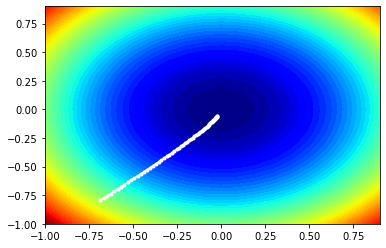

In [7]:
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
#n interations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999

# perform the gradient descent search with adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

#plotting
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

pyplot.show()